# Visualization

Visualizing dataset from https://www.kaggle.com/c/state-farm-distracted-driver-detection.

In [5]:
import importlib, sys
sys.path.insert(0, './../../utils')
import utils; importlib.reload(utils)
from utils import *

%matplotlib inline

base_dir = '../'
batch_size = 64
size = (224,224)

In [7]:
gen = image.ImageDataGenerator()

batches = gen.flow_from_directory(base_dir + 'train/', target_size=size, shuffle=False)
val_batches = gen.flow_from_directory(base_dir + 'valid/', target_size=size, shuffle=False)
test_batches = gen.flow_from_directory(base_dir + 'test/', target_size=size, shuffle=False)

Found 17850 images belonging to 10 classes.
Found 4574 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


## Per Category

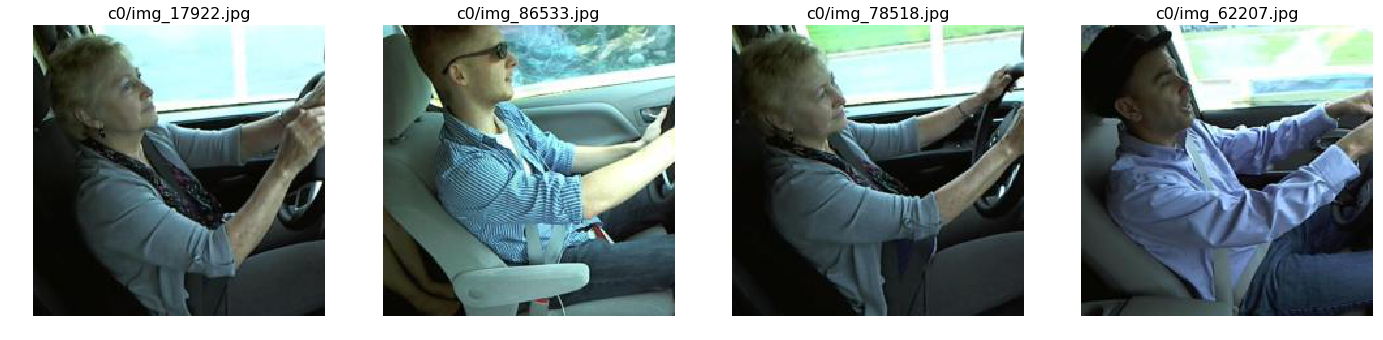

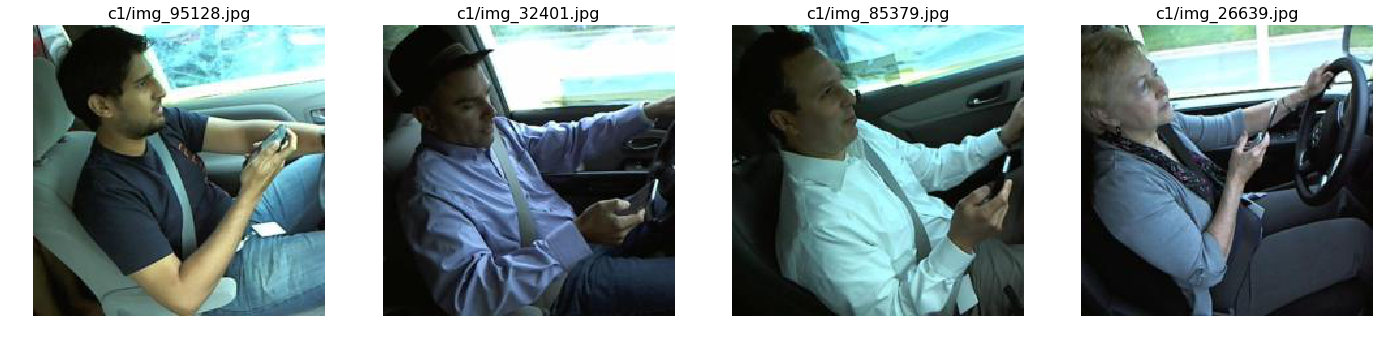

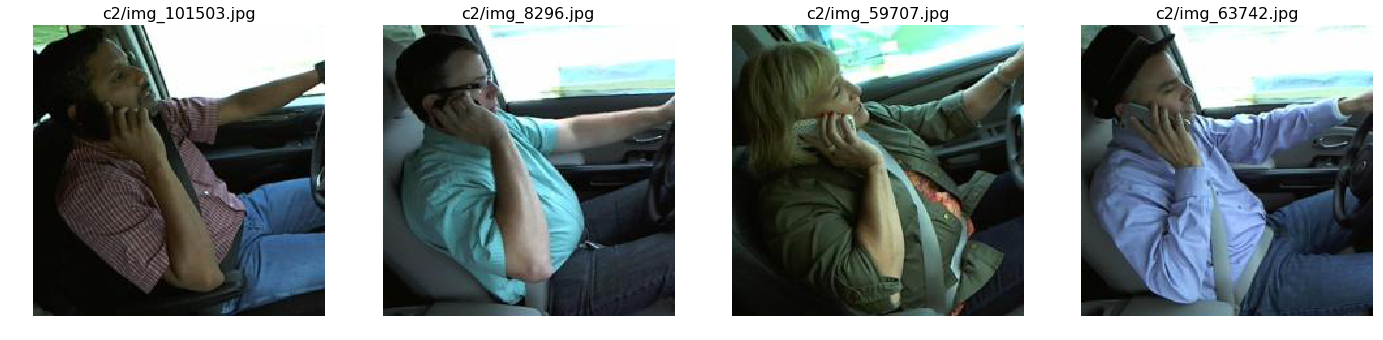

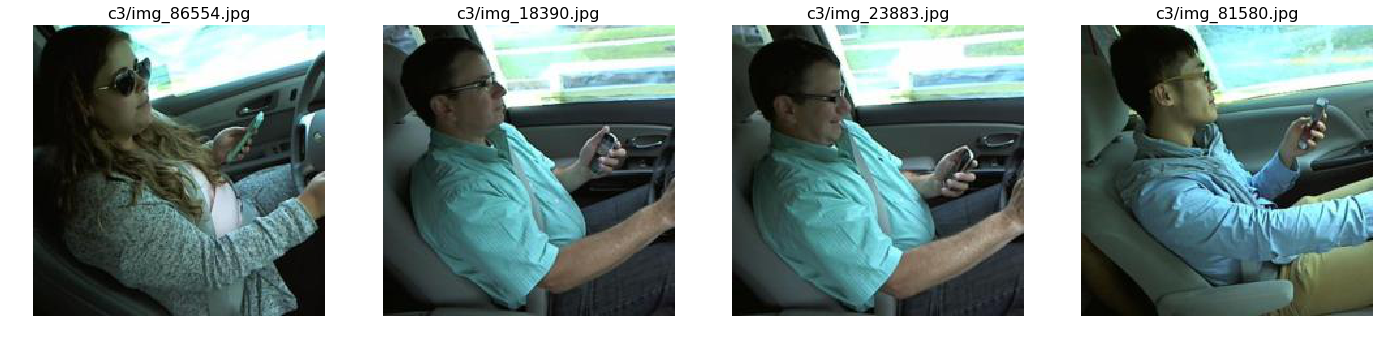

In [9]:
filenames = batches.filenames
labels = batches.classes

for i in range(4):
    idx = np.random.permutation(np.where(labels == i)[0])[:4]
    plot([image.load_img(base_dir + 'cropped_train/' + filenames[j]) for j in idx], titles=[filenames[j] for j in idx])

## Per Driver

In [ ]:
imgs_table = pd.read_csv('../driver_imgs_list.csv')
driver_id = random.sample(imgs_table['subject'].unique().tolist(), 1)
driver_imgs_table = imgs_table[imgs_table['subject'].isin(driver_id)]

img_paths = []
for index, row in driver_imgs_table.iterrows():
    filepath = base_dir + 'train/' + row['classname'] + '/' + row['img']
    if os.path.isfile(filepath): img_paths.append(filepath) # Some have been moved to validation
        
plot_paths(img_paths)